# 응용 작업 - CSV 파일에서 카테고리별 통계치 계산하기

In [3]:
import csv
from datetime import date, datetime

def date_diff(date1, date2):
    try:
        diff = str(datetime.strptime(date1, '%m/%d/%Y') - \
                  datetime.strptime(date2, '%m/%d/%Y')).split()[0]
    except:
        diff = 0
    if diff == '0:00:00':
        diff = 0
    return diff

input_file = 'customer_category_history.csv'
output_file = 'customer_category_history_summary.csv'

packages = {}
previous_name = 'N/A'
previous_package = 'N/A'
previous_package_date = 'N/A'
first_row = True
today = date.today().strftime('%m/%d/%Y')

with open(input_file, 'r', newline='') as input_csv_file:
    filereader = csv.reader(input_csv_file)
    header = next(filereader)
    for row in filereader:
        current_name = row[0]
        current_package = row[1]
        current_package_date = row[3]
        if current_name not in packages:
            packages[current_name] = {}
        if current_package not in packages[current_name]:
            packages[current_name][current_package] = 0
        if current_name != previous_name:
            if first_row:
                first_row = False
            else:
                diff = date_diff(today, previous_package_date)
                if previous_package not in packages[previous_name]:
                    packages[previous_name][previous_package] = int(diff)
                else:
                    packages[previous_name][previous_package] += int(diff)
        else:
            diff = date_diff(current_package_date, previous_package_date)
            packages[previous_name][previous_package] += int(diff)
        previous_name = current_name
        previous_package = current_package
        previous_package_date = current_package_date
        
header = ['Customer Name', 'Category', 'Total Time (in days)']
with open(output_file, 'w', newline='') as output_csv_file:
    filewriter = csv.writer(output_csv_file)
    filewriter.writerow(header)
    for customer_name, customer_name_value in packages.items():
        for package_category, package_category_value in packages[customer_name].items():
            row_of_output = []
            print(customer_name, package_category, package_category_value)
            row_of_output.append(customer_name)
            row_of_output.append(package_category)
            row_of_output.append(package_category_value)
            filewriter.writerow(row_of_output)

John Smith Bronze 70
John Smith Silver 39
John Smith Gold 1896
Mary Yu Silver 72
Mary Yu Gold 1921
Wayne Thompson Bronze 167
Wayne Thompson Silver 1847
Bruce Johnson Bronze 77
Bruce Johnson Silver 60
Bruce Johnson Gold 1850
Annie Lee Bronze 26
Annie Lee Silver 44
Annie Lee Gold 1882
Priya Patel Silver 99
Priya Patel Gold 54


# 데이터 시각화 - 막대그래프

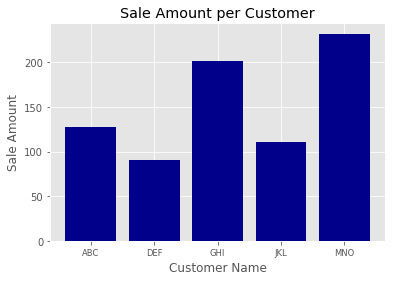

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
customers = ['ABC', 'DEF', 'GHI', 'JKL', 'MNO']
customers_index = range(len(customers))
sale_amounts = [127, 90, 201, 111, 232]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) # ax1이 유일한 하위 그래프 (1행, 1열, 1개)
ax1.bar(customers_index, sale_amounts, align='center', color='darkblue')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.xticks(customers_index, customers, rotation=0, fontsize='small')
plt.xlabel('Customer Name')
plt.ylabel('Sale Amount')
plt.title('Sale Amount per Customer')
plt.savefig('bar_plot.png', dpi=400, bbox_inches='tight')
plt.show()

# 데이터 시각화 - 히스토그램

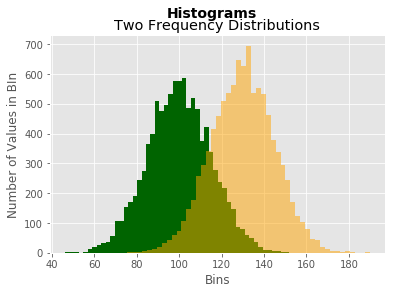

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
mu1, mu2, sigma = 100, 130, 15 # 평균/표준편차 설정
x1 = mu1 + sigma*np.random.randn(10000) # 난수 생성
x2 = mu2 + sigma*np.random.randn(10000) # 난수 생성
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
n, bins, patches = ax1.hist(x1, bins=50, density=False, color='darkgreen') 
# 수치 구간 50개, 확률밀도가 아닌 빈도 표시
n, bins, patches = ax1.hist(x2, bins=50, density=False, color='orange', alpha=0.5)
# 수치 구간 50개, 확률밀도가 아닌 빈도 표시
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.xlabel('Bins')
plt.ylabel('Number of Values in BIn')
fig.suptitle('Histograms', fontsize=14, fontweight='bold')
ax1.set_title('Two Frequency Distributions')
plt.savefig('histogram.png', dpi=400, bbox_inches='tight')
plt.show()

# 데이터 시각화 - 선 그래프

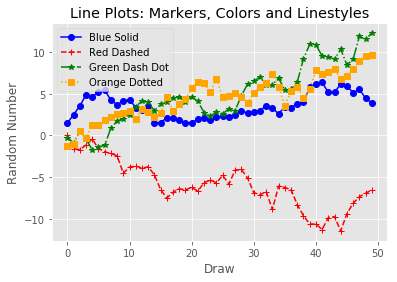

In [9]:
from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plot_data1 = randn(50).cumsum()
plot_data2 = randn(50).cumsum()
plot_data3 = randn(50).cumsum()
plot_data4 = randn(50).cumsum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(plot_data1, marker=r'o', color=u'blue', linestyle='-', label='Blue Solid')
ax1.plot(plot_data2, marker=r'+', color=u'red', linestyle='--', label='Red Dashed')
ax1.plot(plot_data3, marker=r'*', color=u'green', linestyle='-.', label='Green Dash Dot')
ax1.plot(plot_data4, marker=r's', color=u'orange', linestyle=':', label='Orange Dotted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Line Plots: Markers, Colors and Linestyles')
plt.xlabel('Draw')
plt.ylabel('Random Number')
plt.legend(loc='best')
plt.savefig('line_plot.png', dpi=400, bbox_inches='tight')
plt.show()

# 데이터 시각화 - 산점도

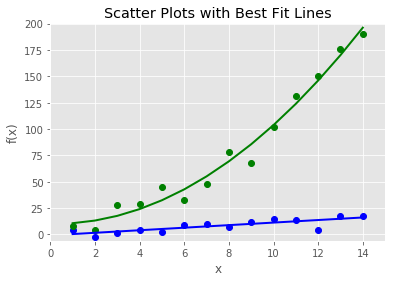

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
x = np.arange(start=1., stop=15., step=1.)
y_linear = x+5. * np.random.randn(14)
y_quadratic = x**2 + 10. * np.random.randn(14)
fn_linear = np.poly1d(np.polyfit(x, y_linear, deg=1))
fn_quadratic = np.poly1d(np.polyfit(x, y_quadratic, deg=2))
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x, y_linear, 'bo', x, y_quadratic, 'go', \
        x, fn_linear(x), 'b-', x, fn_quadratic(x), 'g-', linewidth=2.)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Scatter Plots with Best Fit Lines')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim((min(x)-1., max(x)+1.))
plt.ylim((min(y_quadratic)-10., max(y_quadratic)+10.))
plt.savefig('scatter_plot.png', dpi=400, bbox_inches='tight')
plt.show()

# 데이터 시각화 - boxplot

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(0, 499 + 1) instead
  


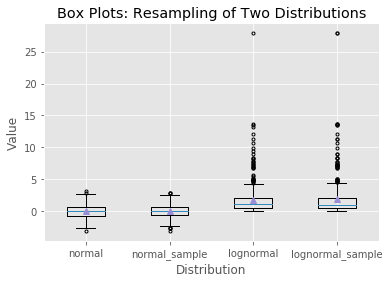

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
N = 500
normal = np.random.normal(loc=0.0, scale=1.0, size=N)
lognormal = np.random.lognormal(mean=0.0, sigma=1.0, size=N)
index_value = np.random.random_integers(low=0, high=N-1, size=N)
normal_sample=normal[index_value]
lognormal_sample=lognormal[index_value]
box_plot_data = [normal, normal_sample, lognormal, lognormal_sample]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
box_labels = ['normal', 'normal_sample', 'lognormal', 'lognormal_sample']
ax1.boxplot(box_plot_data, notch=False, sym='.', vert=True, whis=1.5, \
            showmeans=True, labels=box_labels)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Box Plots: Resampling of Two Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')
plt.savefig('box_plot.png', dpi=400, bbox_inches='tight')
plt.show()

# 데이터 시각화 - pandas

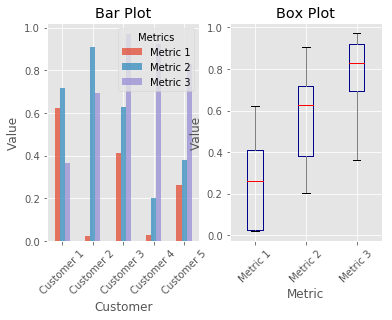

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes.ravel()
data_frame = pd.DataFrame(np.random.rand(5,3),
                         index = ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5'],
                         columns=pd.Index(['Metric 1', 'Metric 2', 'Metric 3'], name='Metrics'))
data_frame.plot(kind='bar', ax=ax1, alpha=0.75, title='Bar Plot')
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax1.get_yticklabels(), rotation=0, fontsize=10)
ax1.set_xlabel('Customer')
ax1.set_ylabel('Value')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

colors=dict(boxes='Darkblue', whiskers='Gray', medians='Red', caps='Black')
data_frame.plot(kind='box', color=colors, sym='r.', ax=ax2, title='Box Plot')
plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax2.get_yticklabels(), rotation=0, fontsize=10)
ax2.set_xlabel('Metric')
ax2.set_ylabel('Value')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

plt.savefig('pandas_plots.png', dpi=400, bbox_inches='tight')
plt.show()

# 데이터 시각화 - seaborn

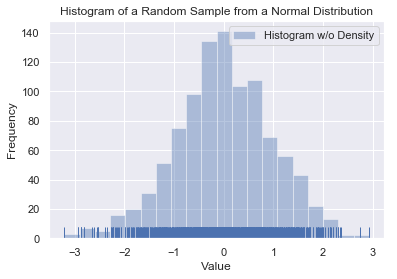

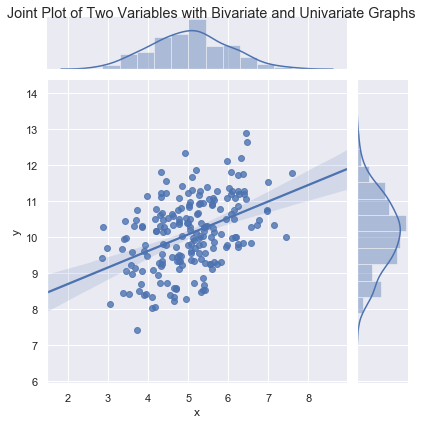

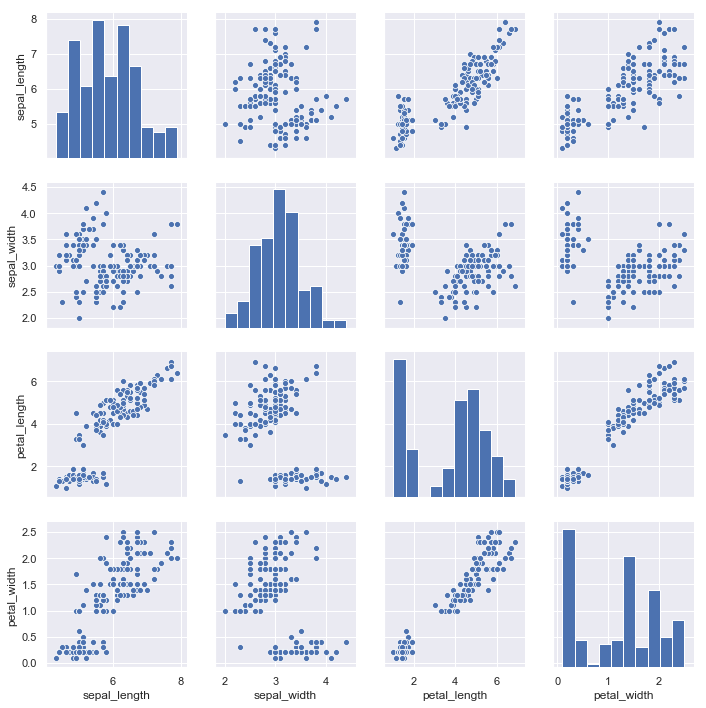

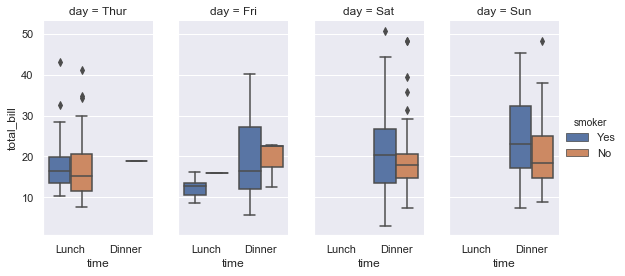

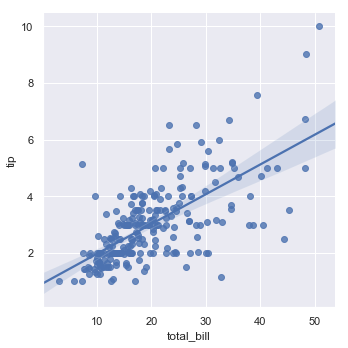

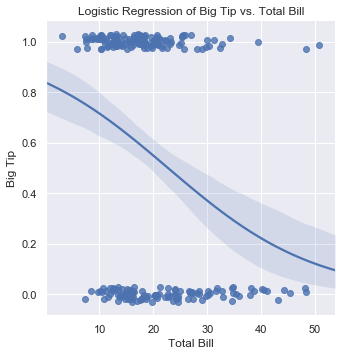

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

x=np.random.normal(size=1000)
sns.distplot(x, bins=20, kde=False, rug=True, label='Histogram w/o Density')
sns.utils.axlabel('Value', 'Frequency')
plt.title('Histogram of a Random Sample from a Normal Distribution')
plt.legend()
plt.show()

mean, cov = [5, 10], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
data_frame = pd.DataFrame(data, columns=['x', 'y'])
sns.jointplot(x='x', y='y', data=data_frame, kind='reg').set_axis_labels('x', 'y')
plt.suptitle('Joint Plot of Two Variables with Bivariate and Univariate Graphs')
plt.show()

iris = sns.load_dataset('iris')
sns.pairplot(iris)
plt.show()

tips=sns.load_dataset('tips')
sns.catplot(x='time', y='total_bill', hue='smoker', col='day', data=tips, kind='box', height=4, aspect=.5)
plt.show()

sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

tips['big_tip'] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x='total_bill', y='big_tip', data=tips, logistic=True,
          y_jitter=.03).set_axis_labels('Total Bill', 'Big Tip')
plt.title('Logistic Regression of Big Tip vs. Total Bill')
plt.show()
